# Part II - Ford GoBike System Data
## by Riga

## Investigation Overview
### Goal of project:
The purpose of this presentation is to investigate and understand the relationship between riding duration and the number of users, considering various personal information factors such as gender, age, and user type, as well as the impact of station location on these variables. By exploring these relationships, we aim to gain insights into how different factors influence the number of users and the duration of their rides. This analysis will provide valuable information on user behavior and preferences, which can help in making informed decisions and improving the overall bike-sharing system.

### Summary of Key Insights:

Based on the plot and analysis, the analyzed factors, including personal information (gender, age, and user type) and station location, have a significant impact on the number of users, but they show relatively little effect on ride duration.
1. Gender and user type have a substantial influence on the users' riding time. The analysis indicates distinct patterns in riding durations between different gender and user type categories, with notable variations in the duration distributions.
2. Age does not appear to be a determining factor in ride duration. The analysis does not show significant variations in ride durations based on different age groups, indicating that age might not strongly affect how long users ride.
3. Station location emerges as a crucial factor that affects users' riding duration. The analysis suggests that certain station locations experience varying riding durations, with some locations showing longer average ride times compared to others.
In conclusion, understanding the impact of different factors on the number of users and ride duration can provide valuable insights for optimizing the bike-sharing system and tailoring services to meet the diverse needs of users based on their personal information and station preferences.

### Dataset Overview

The dataset is consists of 183412 rows and 16 columns. 
The column 'duration_sec' represents the time of each bike trip;
The column 'start_time' and 'end_time' indicate the data and time of each trip at starting and end points;
The column 'start_station_id', 'end_station_id', 'start_station_name','end__station_name' denote the station IDs and names at the starting and end station. Their geological information is provided by column 'start_station_latitude','start_station_longitude','end_station_latitude' and 'end_station_longitude';
The column 'bike_id' is the ID of the bike;
The personal information contains users' age, gender, user type can be gotten from columns 'member_birth_year', 'member_gender','user_type';
The last column 'bike_share_for_all_trip' shows if the shared bike has been used for the whole trip.

There are no duplicated rows, but it has missing values in columns: 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'. 
The numeric columns are: duration_sec(int), bike_id(int), member_birth_year(float), start_station_id(float), end_station_id(float) and start and end latitude and longitude(float). Among them, start_station_id, end_station_id and member_birth_year should convert to int data type. 
The object data type columns contain the time related columns, station location columns and personal information column, including user type (with option: Subscriber and Customer), member_gender(with option: Male and Female), bike_share_for_all_trip(with option: Yes and no).

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
#load in the dataset
df_clean = pd.read_csv('fordgobike-tripdata_clean.csv')
df_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station,37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,39,869.750000
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station,37.786375,-122.404904,5905,Customer,Male,No,51,1030.900000
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,34,608.166667
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,49,26.416667
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,64,29.883333


## 1. Relation of duration time and number of users based on gender and user type
### (1) Plot based on gender:
- The analysis indicates that gender and user type have a significant impact on the number of users but show relatively little influence on the ride duration, which remains concentrated within specific ranges. 
- Male users dominate the chart, with a peak count of around 12,000 users and durations from 5 to 10 minutes. Female and other genders also show peaks in this duration range, but with lower user counts. 

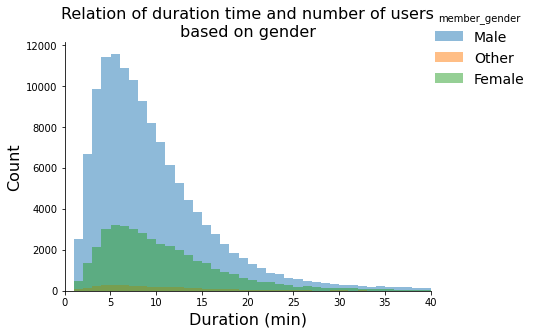

In [9]:
g = sb.FacetGrid(data=df_clean, hue='member_gender', height=4, aspect=1.5)
g.map_dataframe(plt.hist, x='duration_min', 
                bins=np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max() + 1, 1), 
                alpha=0.5)
g.add_legend(fontsize=14, loc='upper right')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim(0, 40)
plt.title('Relation of duration time and number of users'+'\n'
          +'based on gender',fontsize=16)
plt.show()

### (2) Plot based on user type:
- Subscribers form the majority of users, and both customer and subscriber groups have peak duration times within the 5 to 10-minute range.

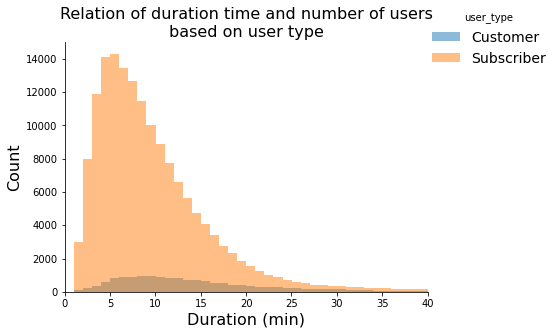

In [10]:
g = sb.FacetGrid(data=df_clean, hue='user_type', height=4, aspect=1.5)
g.map_dataframe(plt.hist, x='duration_min', bins=np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max() + 1, 1), alpha=0.5)
g.add_legend(fontsize=14, loc='upper right')
plt.xlabel('Duration (min)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim(0, 40)
plt.title('Relation of duration time and number of users'+'\n'
          +'based on user type',fontsize=16)
plt.show()

## 2. Relation of duration time and number of users based on age distribution 

- The analysis reveals that age distribution significantly impacts the number of users but has relatively little effect on the ride duration, which remains concentrated within specific ranges. The heat map provides an insightful overview of the distribution concerning duration, number of users, and age demographics. The majority of users, exceeding 1000 individuals, fall within the age range of 22 to 70 years old, with their riding durations generally below 100 minutes. Notably, the largest user group comprises individuals aged between 30 and 40, with a substantial count exceeding 7000. Additionally, there exists a small group of users whose reported age exceeds 140 years old. In summary, age distribution has a significant influence on individual counts but exerts a lesser effect on ride duration.


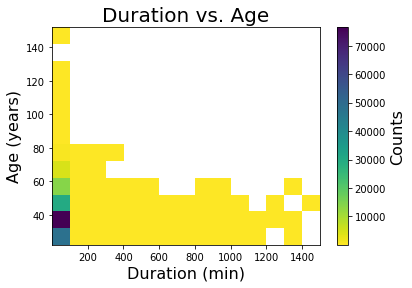

In [11]:
bins_x = np.arange(df_clean['duration_min'].min(), df_clean['duration_min'].max()+100, 100)
bins_y = np.arange(df_clean['age'].min(), df_clean['age'].max()+10, 10)

plt.hist2d(data = df_clean, x = 'duration_min', y = 'age',
           cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y])
colorbar = plt.colorbar()
colorbar.set_label('Counts',fontsize=16)
plt.xlabel('Duration (min)',fontsize=16)
plt.ylabel('Age (years)',fontsize=16)
#plt.xlim(0, 200)
plt.title('Duration vs. Age',fontsize=20);

## 3. Relation of duration time and number of users based on top 10 popular stations

- The complex bar plot matrix, focusing on the top 10 popular stations, provides a comprehensive view of the distribution of the number of users against ride duration for both start and end stations. The y-axis exhibits substantial variations in individual counts across different stations, with peak values ranging from around 750 to over 2000 people.
Simultaneously, the x-axis representing the duration time predominantly concentrates within the 0 to 30-minute range. This visualization demonstrates that station location has a significant impact on the number of users but has relatively little effect on the ride duration, as the majority of durations are confined within a specific time frame regardless of the station location.

In [12]:
# select the top 10 popular start station and store them in top_10_popular_start_station
top_10_popular_start_station = df_clean['start_station_name'].value_counts().head(10).index
# select the top 10 popular end station and store them in top_10_popular_end_station
top_10_popular_end_station = df_clean['end_station_name'].value_counts().head(10).index
# select the top 10 popular station in both start and end station
top_10_popular_station_name = list(set(top_10_popular_start_station) & set(top_10_popular_end_station))

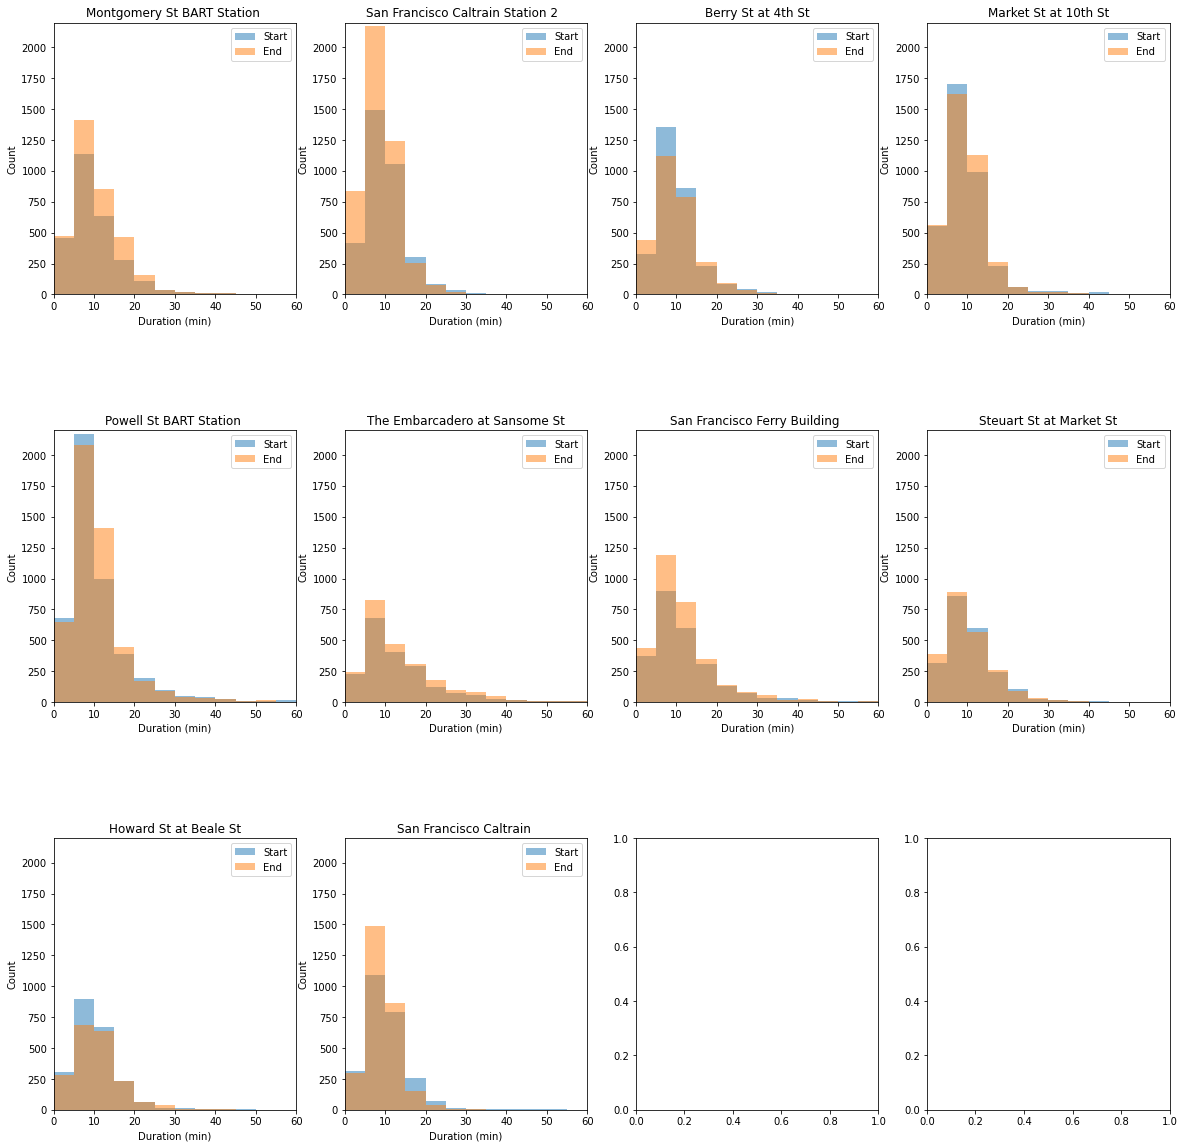

In [13]:
# Create a 4x4 matrix of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
bin_edges = np.arange(0, df_clean['duration_min'].max()+5, 5)
# Loop through each station in the top 10 list and plot the histograms in the corresponding subplot
for i, station in enumerate(top_10_popular_station_name):
    row = i // 4
    col = i % 4

    axes[row, col].hist(df_clean[df_clean['start_station_name'] == station].duration_min,
                        bins=bin_edges, alpha=0.5, label='Start', range=(0, 60))
    axes[row, col].hist(df_clean[df_clean['end_station_name'] == station].duration_min,
                        bins=bin_edges, alpha=0.5, label='End', range=(0, 60))

    axes[row, col].legend()
    axes[row, col].set_xlabel('Duration (min)')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'{station}')
    axes[row, col].set_xlim(0, 60)
    axes[row, col].set_ylim(0, 2200)

# Show the plot
plt.show()

In [15]:
!jupyter nbconvert Part_II_slide_deck_FordGoBikeSystemData.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_FordGoBikeSystemData.ipynb to slides
[NbConvertApp] Writing 718009 bytes to Part_II_slide_deck_FordGoBikeSystemData.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_FordGoBikeSystemData.slides.html
Use Control-C to stop this server
